Package installation:

In [1]:
import sys
import os.path
!pip install atlasopenmagic
from atlasopenmagic import install_from_environment
install_from_environment()

Installing packages: ['aiohttp>=3.9.5', 'atlasopenmagic>=1.2.0', 'awkward>=2.6.7', 'awkward-pandas>=2023.8.0', 'coffea~=0.7.0', 'fsspec>=2025.7.0', 'hist>=2.8.0', 'ipykernel>=6.29.5', 'jupyter>=1.0.0', 'lmfit>=1.3.2', 'matplotlib>=3.9.1', 'metakernel>=0.30.2', 'notebook<7', 'numpy>=1.26.4', 'pandas>=2.2.2', 'papermill>=2.6.0', 'pip>=24.2', 'scikit-learn>=1.5.1', 'uproot>=5.3.10', 'uproot3>=3.14.4', 'fsspec-xrootd>=0.5.1', 'jupyterlab_latex~=3.1.0', 'vector>=1.4.1']
Installation complete. You may need to restart your Python environment for changes to take effect.


In [1]:
import numpy as np # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting
import matplotlib_inline # to edit the inline plot format
from matplotlib.ticker import AutoMinorLocator # for minor ticks
import uproot # for reading .root files
import awkward as ak # to represent nested data in columnar format
import vector # for 4-momentum calculations
import time # for printing time stamps
import requests # for file gathering, if needed

In [2]:
import atlasopenmagic as atom
atom.available_releases()
atom.set_release('2025e-13tev-beta')

Available releases:
2016e-8tev        2016 Open Data for education release of 8 TeV proton-proton collisions (https://opendata.cern.ch/record/3860).
2020e-13tev       2020 Open Data for education release of 13 TeV proton-proton collisions (https://cern.ch/2r7xt).
2024r-pp          2024 Open Data for research release for proton-proton collisions (https://opendata.cern.record/80020).
2024r-hi          2024 Open Data for research release for heavy-ion collisions (https://opendata.cern.ch/record/80035).
2025e-13tev-beta  2025 Open Data for education and outreach beta release for 13 TeV proton-proton collisions(https://opendata.cern.ch/record/93910).
2025r-evgen       2025 Open Data for research release for event generation (https://opendata.cern.ch/record/160000).
Fetching and caching all metadata for release: 2025e-13tev-beta...
Successfully cached 374 datasets.
Active release: 2025e-13tev-beta. (Datasets path: REMOTE)


Unit definitions, as stored in the data files

In [3]:
MeV = 0.001
GeV = 1.0

In [4]:
lumi = 36.6 # fb-1 # data size of the full release

skim = "noskim"

MV2c10_lim = 4 # MV2c10 b-tagging algorithm discriminant cut value

fraction=1

#Dictionary to store the samples:

In [5]:
atom.available_keywords()

['1jet',
 '1lepton',
 '2electron',
 '2lepton',
 '2muon',
 '2neutrino',
 '2photon',
 '2tau',
 '3lepton',
 '3photon',
 '4lepton',
 '4top',
 'BSM',
 'BSMHiggs',
 'BSMtop',
 'Higgs',
 'NLO',
 'QCD',
 'SM',
 'SMHiggs',
 'SSM',
 'VBF',
 'VBS',
 'W',
 'WHiggs',
 'WIMP',
 'WW',
 'WZ',
 'Wprime',
 'Wt',
 'Z',
 'ZH',
 'ZHiggs',
 'ZZ',
 'Zgamma',
 'Zprime',
 'allHadronic',
 'allhadronic',
 'bbbar',
 'bsm',
 'bsmtop',
 'chargino',
 'diboson',
 'dijet',
 'diphoton',
 'egamma',
 'electron',
 'electroweak',
 'exotic',
 'gaugino',
 'gluino',
 'gluonFusionHiggs',
 'gravitino',
 'heavyBoson',
 'higgs',
 'higgsino',
 'inclusive',
 'invisible',
 'jets',
 'lepton',
 'leptoquark',
 'mH125',
 'multilepton',
 'muon',
 'neutralino',
 'neutrino',
 'nlo',
 'performance',
 'photon',
 'quark',
 'resonance',
 'rpv',
 'sChannel',
 'scalar',
 'schannel',
 'simplifiedModel',
 'simplifiedmodel',
 'singleTop',
 'singletop',
 'sm',
 'smhiggs',
 'squark',
 'stau',
 'stop',
 'susy',
 'tHiggs',
 'tZ',
 'tau',
 'thiggs',
 't

In [6]:
atom.match_metadata(field='keywords',value='top')

[('302733', 'MadGraphPythia8EvtGen_A14NNPDF23LO_WpL_tblep_M3000'),
 ('304014', 'MadGraphPythia8EvtGen_A14NNPDF23_3top_SM'),
 ('306149', 'MadGraphPythia8EvtGen_A14NNPDF23LO_WpL_tbhad_M3000'),
 ('346198', 'PhPy8EG_A14NNPDF23_NNPDF30ME_ttH125_Zgam'),
 ('346343', 'PhPy8EG_A14NNPDF23_NNPDF30ME_ttH125_allhad'),
 ('346344', 'PhPy8EG_A14NNPDF23_NNPDF30ME_ttH125_semilep'),
 ('346345', 'PhPy8EG_A14NNPDF23_NNPDF30ME_ttH125_dilep'),
 ('346525', 'PowhegPythia8EvtGen_A14NNPDF23_NNPDF30ME_ttH125_gamgam'),
 ('346919', 'PhPy8EG_A14NNPDF23_NNPDF30ME_ttH125_allhad_tautau_unpol'),
 ('346923', 'PhPy8EG_A14NNPDF23_NNPDF30ME_ttH125_semilep_tautau_unpol'),
 ('346927', 'PhPy8EG_A14NNPDF23_NNPDF30ME_ttH125_dilep_tautau_unpol'),
 ('375884', 'MGPy8EG_A14N_GG_ttn1_2000_5000_200'),
 ('410081', 'MadGraphPythia8EvtGen_A14NNPDF23_ttbarWW'),
 ('410082', 'MadGraphPythia8EvtGen_A14NNPDF23LO_ttgamma_noallhad'),
 ('410087', 'MadGraphPythia8EvtGen_A14NNPDF23LO_ttgamma_allhad'),
 ('410389', 'MadGraphPythia8EvtGen_A14NNPDF23_

In [7]:
atom.match_metadata(field='keywords',value='susy')

[('375884', 'MGPy8EG_A14N_GG_ttn1_2000_5000_200'),
 ('376359', 'MGPy8EG_A14N23LO_SS_onestepCC_1600_900_200'),
 ('392202', 'MGPy8EG_A14N23LO_C1N2_WZ_500p0_100p0_3L_2L7'),
 ('398384', 'MGPy8EG_A14N23LO_C1N2N1_GGMHinoZh50_800_noFilter'),
 ('448624', 'MGPy8EG_A14N23LO_TT_higgsinoRPV_1075_700'),
 ('449595', 'MGPy8EG_A14N23LO_TT_RPVdirectBL_1400'),
 ('501058', 'MGPy8EG_StauStauDirect_200p0_1p0_TFilt'),
 ('507366', 'MGPy8EG_A14NNPDF23LO_GGM_N1N2C1_950'),
 ('510097', 'MGPy8EG_A14N23LO_DM_4topscalar_p1000_c1_nonallhad'),
 ('523692', 'MGPy8EG_A14N23LO_TT_tN1_1200_200_MS')]

In [69]:
defs = {
    r'single_top': {'dids': [601355], 'color': "#ff0000"}, #red
    r'ttbar':    {'dids': [410081], 'color': "#6b59d3" }, #purple
    r'susy_signal':  {'dids': [523692],'color': "#00cdff" }, #blue
}

samples   = atom.build_dataset(defs, protocol='https', cache=True)

In [70]:
samples.keys()

dict_keys(['single_top', 'ttbar', 'susy_signal'])

#Variables:

In [71]:
variables = ["lep_n", "jet_n", "met", "jet_pt", "jet_eta", "jet_phi", "jet_e", "jet_btag_quantile", "met_phi"]

#Cuts:

In [72]:
#no leptons requirement
def no_lep(lep_n):
    # Return True if no lepton in the event
    return lep_n == 0

In [73]:
#at least 4 jets requirement
def four_jets(jet_n):
    # Return True if at least 4 jets in the event
    return jet_n >= 4

In [77]:
 #delta phi
 def wrap_delta_phi(phi1,phi2):
        dphi=phi1-phi2
        dphi = ak.where(dphi > np.pi, dphi - 2 * np.pi, dphi)
        dphi = ak.where(dphi < -np.pi, dphi + 2 * np.pi, dphi)
        return ak.where(abs(dphi)>0.4, True, False)

In [74]:
#missing transverse energy cut
def cut_met(met):
    # Return True if missing ET is above 400 GeV
    return met > 400

In [75]:
#transverse momentum cuts
def cut_jet_pt(jet_pt):
  #Return True if  jet1 and jet2 have pt over 80 GeV  and jet3 and jet4 have pt over 40 GeV
  jet_pt_bool = (jet_pt[:,0] >= 80) & (jet_pt[:,1] >= 80) & (jet_pt[:,2] >= 40) & (jet_pt[:,3] >= 40)
  return jet_pt_bool

In [76]:
#at least one b-jet
def cut_btag(jet_MV2c10):
    # Return True if at least one b-tagged jet in the event
    num_btag = ak.sum(jet_MV2c10 >= MV2c10_lim, axis=1) >= 1
    return num_btag

#Weights:

In [78]:
weight_variables=["filteff","kfac","xsec","mcWeight","ScaleFactor_PILEUP","ScaleFactor_BTAG"]

In [79]:
def calc_weight(weight_variables, events):
    total_weight = lumi * 1000 / events["sum_of_weights"]
    for variable in weight_variables:
        total_weight = total_weight * abs(events[variable])
    return total_weight

#For one file:

In [80]:
signal = samples['susy_signal']['list'][0]
tree=uproot.open(signal+":analysis")

In [81]:
print(tree.keys())

['num_events', 'sum_of_weights', 'sum_of_weights_squared', 'xsec', 'kfac', 'filteff', 'TriggerMatch_DILEPTON', 'ScaleFactor_MLTRIGGER', 'ScaleFactor_PILEUP', 'ScaleFactor_FTAG', 'mcWeight', 'channelNumber', 'eventNumber', 'runNumber', 'trigML', 'trigP', 'trigDT', 'trigT', 'trigE', 'trigDM', 'trigDE', 'trigM', 'trigMET', 'ScaleFactor_BTAG', 'ScaleFactor_JVT', 'jet_n', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_e', 'jet_btag_quantile', 'jet_jvt', 'largeRJet_n', 'largeRJet_pt', 'largeRJet_eta', 'largeRJet_phi', 'largeRJet_e', 'largeRJet_m', 'largeRJet_D2', 'jet_pt_jer1', 'jet_pt_jer2', 'ScaleFactor_ELE', 'ScaleFactor_MUON', 'ScaleFactor_LepTRIGGER', 'ScaleFactor_MuTRIGGER', 'ScaleFactor_ElTRIGGER', 'lep_n', 'lep_type', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_e', 'lep_charge', 'lep_ptvarcone30', 'lep_topoetcone20', 'lep_z0', 'lep_d0', 'lep_d0sig', 'lep_isTightID', 'lep_isMediumID', 'lep_isLooseID', 'lep_isTightIso', 'lep_isLooseIso', 'lep_isTrigMatched', 'ScaleFactor_PHOTON', 'photon_n', 'photon_pt

In [82]:
sample_data= [] #empty list
# Perform the cuts for each data entry in the tree
for data in tree.iterate(variables, library="ak"): # the data will be in the form of an awkward array

      lep_n=data["lep_n"]
      data=data[no_lep(lep_n)]

      jet_n=data["jet_n"]
      data=data[four_jets(jet_n)]

      met=data["met"]
      data=data[cut_met(met)]

      jet_pt=data["jet_pt"]
      data=data[cut_jet_pt(jet_pt)]

      jet_MV2c10=data["jet_btag_quantile"]
      data=data[cut_btag(jet_MV2c10)]

      delta_phi_cut = wrap_delta_phi(data["met_phi"],data["jet_phi"][:,0]) & wrap_delta_phi(data["met_phi"],data["jet_phi"][:,1])
      data = data[delta_phi_cut]

      # Append data to the whole sample data list
      sample_data.append(data)
# turns sample_data back into an awkward array
data_A = ak.concatenate(sample_data)

##Plot missing transverse energy:

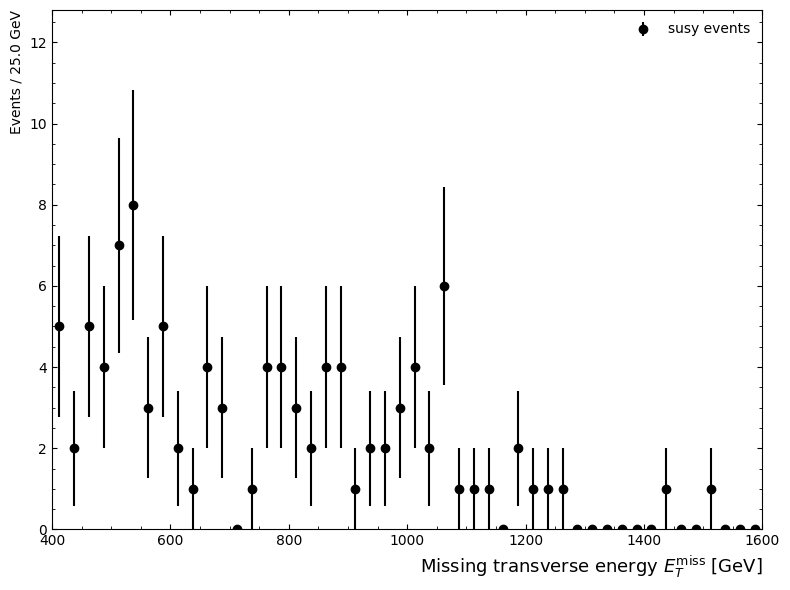

In [83]:
# Use the MET variable from the filtered data
met_data = data_A['met']

# x-axis range and binning
xmin = 400 * GeV
xmax = 1600  * GeV
step_size = 25  * GeV

bin_edges = np.arange(start=xmin, stop=xmax + step_size, step=step_size)
bin_centres = np.arange(start=xmin + step_size/2, stop=xmax + step_size/2, step=step_size)

# Histogram the data
data_x, _ = np.histogram(ak.to_numpy(met_data), bins=bin_edges)
data_x_errors = np.sqrt(data_x)

# ----------------------------
# Main plot
# ----------------------------
fig, ax = plt.subplots(figsize=(8,6))

# plot the data points with error bars
ax.errorbar(
    x=bin_centres,
    y=data_x,
    yerr=data_x_errors,
    fmt='ko',        # black circles
    label='susy events'
)

# x and y limits
ax.set_xlim(left=xmin, right=xmax)
ax.set_ylim(bottom=0, top=np.amax(data_x)*1.6)

# axis labels
ax.set_xlabel(r'Missing transverse energy $E_T^{\rm miss}$ [GeV]',
              fontsize=13, x=1, horizontalalignment='right')
ax.set_ylabel('Events / '+str(step_size)+' GeV',
              y=1, horizontalalignment='right')

# ticks
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', direction='in', top=True, right=True)

# legend
ax.legend(frameon=False)

plt.tight_layout()
plt.show()

#For whole data:

In [84]:
# Define empty dictionary to hold awkward arrays
all_data = {}

# Loop over samples
for s in samples:

    # Print which sample is being processed
    print('Processing '+s+' samples')

    # Define empty list to hold data
    frames = []

    # Loop over each file
    for val in samples[s]['list']:
        fileString = val

        # start the clock
        start = time.time()
        print("\t"+val+":")

        # Open file
        tree = uproot.open(fileString + ":analysis")

        sample_data = []

        # Loop over data in the tree
        for data in tree.iterate(variables + weight_variables + ["sum_of_weights"],
                                 library="ak",
                                 entry_stop=tree.num_entries*fraction): # process up to numevents*fraction

            # Number of events in this batch
            nIn = len(data)


            lep_n=data["lep_n"]
            data=data[no_lep(lep_n)]

            jet_n=data["jet_n"]
            data=data[four_jets(jet_n)]

            met=data["met"]
            data=data[cut_met(met)]

            jet_pt=data["jet_pt"]
            data=data[cut_jet_pt(jet_pt)]

            jet_MV2c10=data["jet_btag_quantile"]
            data=data[cut_btag(jet_MV2c10)]

            delta_phi_cut = wrap_delta_phi(data["met_phi"],data["jet_phi"][:,0]) & wrap_delta_phi(data["met_phi"],data["jet_phi"][:,1])
            data = data[delta_phi_cut]

            # Store Monte Carlo weights in the data
            data['totalWeight'] = calc_weight(weight_variables, data)

            # Append data to the whole sample data list
            sample_data.append(data)

            nOut = sum(data['totalWeight']) # sum of weights passing cuts in this batch

            elapsed = time.time() - start # time taken to process
            print("\t\t nIn: "+str(nIn)+",\t nOut: \t"+str(nOut)+"\t in "+str(round(elapsed,1))+"s") # events before and after

        frames.append(ak.concatenate(sample_data))

    all_data[s] = ak.concatenate(frames) # dictionary entry is concatenated awkward arrays

Processing single_top samples
	simplecache::https://opendata.cern.ch/eos/opendata/atlas/rucio/user/egramsta/mc_601355.PhPy8EG_tW_dyn_DR_incl_top.noskim.root:
		 nIn: 1166536,	 nOut: 	3.427872745140375	 in 3.8s
		 nIn: 1166536,	 nOut: 	3.3438058447414125	 in 7.0s
		 nIn: 298923,	 nOut: 	0.4819511008299875	 in 7.8s
Processing ttbar samples
	simplecache::https://opendata.cern.ch/eos/opendata/atlas/rucio/user/egramsta/mc_410081.MadGraphPythia8EvtGen_A14NNPDF23_ttbarWW.noskim.root:
		 nIn: 29884,	 nOut: 	0.02321802763477611	 in 0.7s
Processing susy_signal samples
	simplecache::https://opendata.cern.ch/eos/opendata/atlas/rucio/user/egramsta/mc_523692.MGPy8EG_A14N23LO_TT_tN1_1200_200_MS.noskim.root:
		 nIn: 9970,	 nOut: 	0.6526619374580738	 in 0.1s


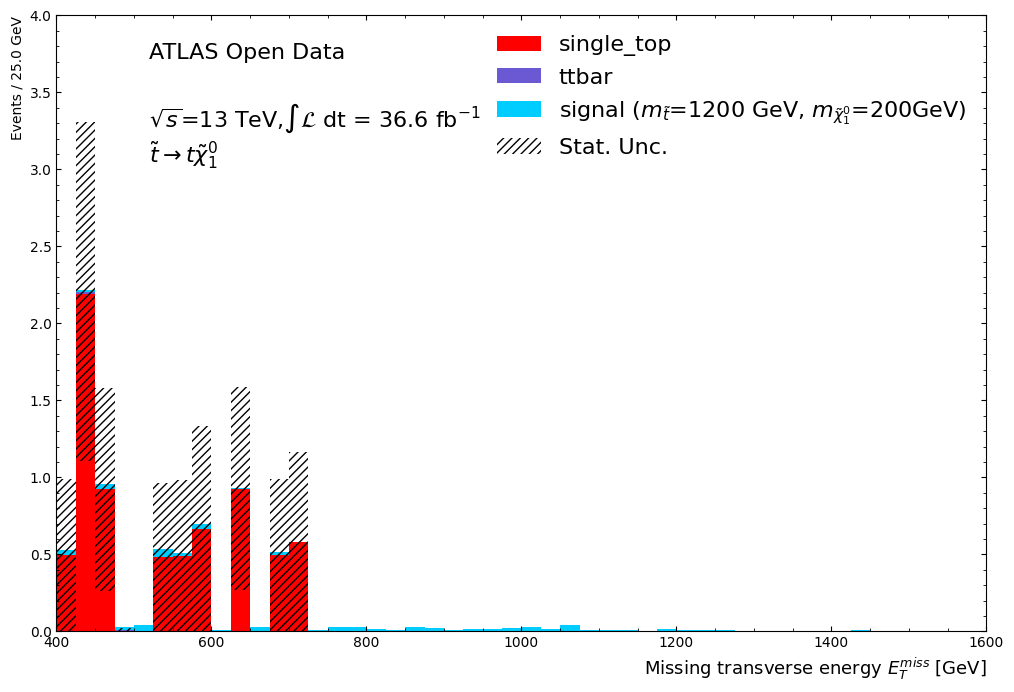

In [87]:
# x-axis range and binning
xmin = 400 * GeV
xmax = 1600  * GeV
step_size = 25  * GeV

bin_edges = np.arange(start=xmin, stop=xmax + step_size, step=step_size)
bin_centres = np.arange(start=xmin + step_size/2, stop=xmax + step_size/2, step=step_size)

signal_x = ak.to_numpy(all_data[r'susy_signal']['met']) # histogram the signal
signal_weights = ak.to_numpy(all_data[r'susy_signal'].totalWeight) # get the weights of the signal events
signal_color = samples[r'susy_signal']['color'] # get the colour for the signal bar

mc_x = [] # define list to hold the Monte Carlo histogram entries
mc_weights = [] # define list to hold the Monte Carlo weights
mc_colors = [] # define list to hold the colors of the Monte Carlo bars
mc_labels = [] # define list to hold the legend labels of the Monte Carlo bars

for s in samples: # loop over samples
    if s not in [r'susy_signal']: # if not signal
        mc_x.append( ak.to_numpy(all_data[s]['met']) ) # append to the list of Monte Carlo histogram entries
        mc_weights.append( ak.to_numpy(all_data[s].totalWeight) ) # append to the list of Monte Carlo weights
        mc_colors.append( samples[s]['color'] ) # append to the list of Monte Carlo bar colors
        mc_labels.append( s ) # append to the list of Monte Carlo legend labels

# *************
# Main plot
# *************
fig, main_axes = plt.subplots(figsize=(12, 8))

# plot the Monte Carlo bars
mc_heights = main_axes.hist(mc_x, bins=bin_edges,
                            weights=mc_weights, stacked=True,
                            color=mc_colors, label=mc_labels )

mc_x_tot = mc_heights[0][-1] # stacked background MC y-axis value

# calculate MC statistical uncertainty: sqrt(sum w^2)
mc_x_err = np.sqrt(np.histogram(np.hstack(mc_x), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])

# plot the signal bar
signal_heights = main_axes.hist(signal_x, bins=bin_edges, bottom=mc_x_tot,
                weights=signal_weights, color=signal_color,
                label=r'signal ($m_{\~t}$=1200 GeV, $m_{\~{\chi}^0_1}$=200GeV)')

# plot the statistical uncertainty
main_axes.bar(bin_centres, # x
                2*mc_x_err, # heights
                alpha=0.5, # half transparency
                bottom=mc_x_tot-mc_x_err, color='none',
                hatch="////", width=step_size, label='Stat. Unc.' )

# set the x-limit of the main axes
main_axes.set_xlim( left=xmin, right=xmax )

# separation of x axis minor ticks
main_axes.xaxis.set_minor_locator( AutoMinorLocator() )

# set the axis tick parameters for the main axes
main_axes.tick_params(which='both', # ticks on both x and y axes
                        direction='in', # Put ticks inside and outside the axes
                        top=True, # draw ticks on the top axis
                        right=True ) # draw ticks on right axis

# x-axis label
main_axes.set_xlabel(r'Missing transverse energy $E_{T}^{miss}$ [GeV]',
                    fontsize=13, x=1, horizontalalignment='right' )

# write y-axis label for main axes
main_axes.set_ylabel('Events / '+str(step_size)+' GeV',
                        y=1, horizontalalignment='right')

# set y-axis limits for main axes
main_axes.set_ylim( bottom=0, top=4 )

# add minor ticks on y-axis for main axes
main_axes.yaxis.set_minor_locator( AutoMinorLocator() )

# Add text 'ATLAS Open Data' on plot
plt.text(0.1, # x
            0.93, # y
            'ATLAS Open Data', # text
            transform=main_axes.transAxes, # coordinate system used is that of main_axes
            fontsize=16 )

# Add energy and luminosity
lumi_used = str(lumi*fraction) # luminosity to write on the plot
plt.text(0.1, # x
            0.82, # y
            r'$\sqrt{s}$=13 TeV,$\int\mathcal{L}$ dt = '+lumi_used+' fb$^{-1}$', # text
            transform=main_axes.transAxes,fontsize=16 ) # coordinate system used is that of main_axes

# Add a label for the analysis carried out
plt.text(0.1, # x
            0.76, # y
            r'$\~t \rightarrow t \~{\chi}^0_1$', # text
            transform=main_axes.transAxes,fontsize=16 ) # coordinate system used is that of main_axes


# draw the legend
my_legend = main_axes.legend( frameon=False, fontsize=16 ) # no box around the legend